In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.listdir("./data")

['subjecta-concentrating-1.csv',
 'subjecta-concentrating-2.csv',
 'subjecta-neutral-1.csv',
 'subjecta-neutral-2.csv',
 'subjecta-relaxed-1.csv',
 'subjecta-relaxed-2.csv',
 'subjectb-concentrating-1.csv',
 'subjectb-concentrating-2.csv',
 'subjectb-neutral-1.csv',
 'subjectb-neutral-2.csv',
 'subjectb-relaxed-1.csv',
 'subjectb-relaxed-2.csv',
 'subjectc-concentrating-1.csv',
 'subjectc-concentrating-2.csv',
 'subjectc-neutral-1.csv',
 'subjectc-neutral-2.csv',
 'subjectc-relaxed-1.csv',
 'subjectc-relaxed-2.csv',
 'subjectd-concentrating-1.csv',
 'subjectd-concentrating-2.csv',
 'subjectd-neutral-1.csv',
 'subjectd-neutral-2.csv',
 'subjectd-relaxed-1.csv',
 'subjectd-relaxed-2.csv']

In [3]:
test_df = pd.read_csv("./data/subjecta-concentrating-1.csv")
test_df

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.533223e+09,59.105,28.320,15.137,12.207,54.199
1,1.533223e+09,62.012,30.273,43.945,11.719,79.102
2,1.533223e+09,44.922,30.273,-97.656,11.230,32.715
3,1.533223e+09,28.809,27.832,-110.352,9.277,29.785
4,1.533223e+09,36.156,28.809,-73.242,11.230,50.781
...,...,...,...,...,...,...
15187,1.533223e+09,25.391,33.203,-388.672,22.461,19.043
15188,1.533223e+09,35.645,33.203,-136.230,24.902,0.977
15189,1.533223e+09,48.828,31.250,258.789,38.086,-15.137
15190,1.533223e+09,50.293,31.250,264.160,39.551,-5.859


In [4]:
len(test_df)

15192

In [5]:
test_df.dtypes

timestamps    float64
TP9           float64
AF7           float64
AF8           float64
TP10          float64
Right AUX     float64
dtype: object

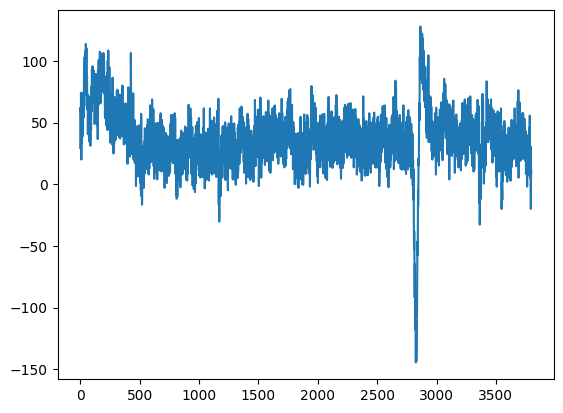

In [6]:
plt.plot(test_df["TP9"][0:int(len(test_df)/4)])

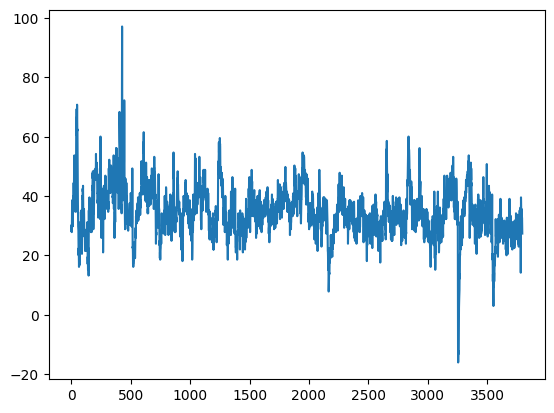

In [7]:
plt.plot(test_df["AF7"][0:int(len(test_df)/4)])

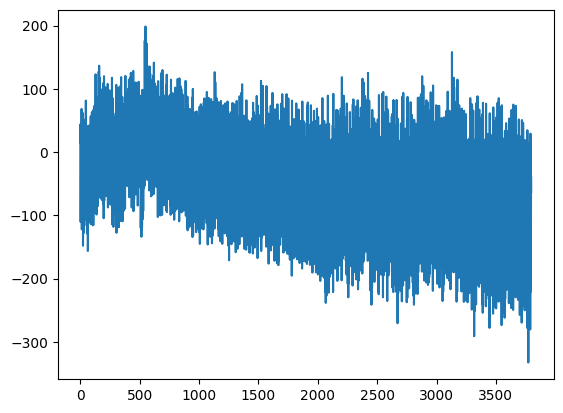

In [8]:
plt.plot(test_df["AF8"][0:int(len(test_df)/4)])

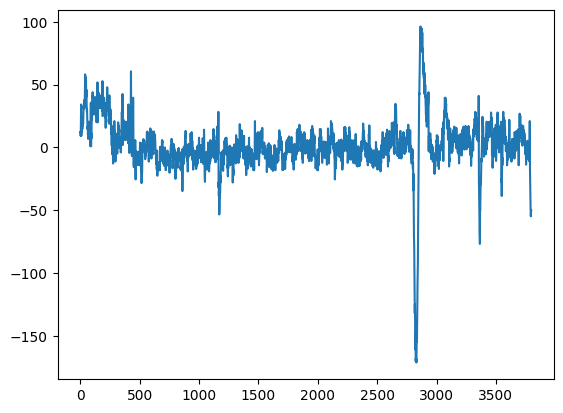

In [9]:
plt.plot(test_df["TP10"][0:int(len(test_df)/4)])

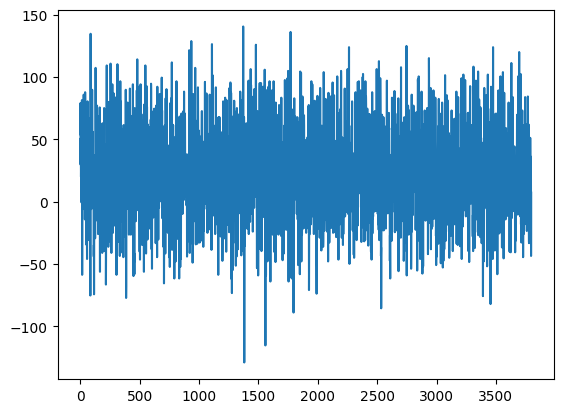

In [10]:
plt.plot(test_df["Right AUX"][0:int(len(test_df)/4)])

In [11]:
#iterate over each file
def check_timestamps(path):
    min_t = 10000000
    for file in os.listdir(path):
        filename = path+'/'+file

        #read_dataframe
        signals_df = pd.read_csv(filename)

        #check time stamps
        T_dict = {}
        for i in range(1,len(signals_df["timestamps"])):
            if (signals_df["timestamps"][i] - signals_df["timestamps"][i-1]) not in T_dict:
                T_dict[signals_df["timestamps"][i] - signals_df["timestamps"][i-1]] = 1
            else :
                T_dict[signals_df["timestamps"][i] - signals_df["timestamps"][i-1]] +=1

            if signals_df["timestamps"][i] - signals_df["timestamps"][i-1] < min_t:
                min_t = signals_df["timestamps"][i] - signals_df["timestamps"][i-1]
        #should print a single value and the same value for each file
        print(min_t)
        print(filename)
        print(T_dict)
        print("duration", signals_df["timestamps"][len(signals_df)-1] -signals_df["timestamps"][0] )
        print("dataframe length",len(signals_df),'\n')

        check_timestamps("./data")

0.0029997825622558594
./data/subjecta-concentrating-1.csv
{0.003999948501586914: 10795, 0.004000186920166016: 2969, 0.003000020980834961: 1306, 0.0029997825622558594: 121}
duration 59.337000131607056
dataframe length 15192 

0.0029997825622558594
./data/subjecta-concentrating-2.csv
{0.003000020980834961: 1184, 0.004000186920166016: 2612, 0.003999948501586914: 9482, 0.0029997825622558594: 113}
duration 52.26700019836426
dataframe length 13392 

0.0029997825622558594
./data/subjecta-neutral-1.csv
{0.003999948501586914: 10803, 0.004000186920166016: 2970, 0.003000020980834961: 1309, 0.0029997825622558594: 121}
duration 59.38199996948242
dataframe length 15204 

0.0029997825622558594
./data/subjecta-neutral-2.csv
{0.003999948501586914: 10798, 0.004000186920166016: 2985, 0.003000020980834961: 1298, 0.0029997825622558594: 134}
duration 59.42799997329712
dataframe length 15216 

0.0029997825622558594
./data/subjecta-relaxed-1.csv
{0.003999948501586914: 10802, 0.004000186920166016: 2971, 0.0030

In [12]:
df = pd.read_csv("./data/subjectc-neutral-1.csv")
(df["timestamps"][len(df)-1] - df["timestamps"][0])

59.38199996948242

# Interpolate the signals for homogenous sampling across all signals
## with dt=0.004

In [16]:
# problem in ./data/subjectb-relaxed-2.csv file
# the sampling is non homogenous and it require interoplation

import numpy as np
from scipy.interpolate import interp1d

def interpolate_dataset(path, dt):
    for file in os.listdir(path):
        filename = directory+'/'+file
        #read_dataframe
        signals_df = pd.read_csv(filename)

        timestamps = np.array(signals_df["timestamps"]-signals_df["timestamps"][0],dtype = "float64")

        print(timestamps)
        signal_df = signals_df.drop("timestamps", axis=1)

        new_df = pd.DataFrame(columns = signals_df.columns)
        t_interp = np.arange(timestamps[0], timestamps[-1] + dt, dt)
        new_df["timestamps"] = t_interp

        for column in signal_df:
            signal = signal_df[column]

            # Interpolate the signal onto the regular time grid
            signal_interp = np.interp(t_interp, timestamps, signal)
            new_df[column] = signal_interp
        
        try:
            os.mkdir("./interpolated_signals/")
        except:
            pass
        new_df.to_csv("./interpolated_signals/"+file,index=False)


interpolate_dataset("./data", 0.003999948501586914)



[0.00000000e+00 3.99994850e-03 7.99989700e-03 ... 5.93290000e+01
 5.93329999e+01 5.93370001e+01]
[0.00000000e+00 3.00002098e-03 7.00020790e-03 ... 5.22590001e+01
 5.22630000e+01 5.22670002e+01]
[0.00000000e+00 3.99994850e-03 7.99989700e-03 ... 5.93739998e+01
 5.93780000e+01 5.93820000e+01]
[0.00000000e+00 3.99994850e-03 7.99989700e-03 ... 5.94199998e+01
 5.94240000e+01 5.94280000e+01]
[0.00000000e+00 3.99994850e-03 7.99989700e-03 ... 5.93739998e+01
 5.93780000e+01 5.93820000e+01]
[0.00000000e+00 4.00018692e-03 8.00013542e-03 ... 5.93750000e+01
 5.93790002e+01 5.93830001e+01]
[0.00000000e+00 3.00002098e-03 6.99996948e-03 ... 4.43769999e+01
 4.43810000e+01 4.43850000e+01]
[0.00000000e+00 3.99994850e-03 7.99989700e-03 ... 4.44229999e+01
 4.44269998e+01 4.44310000e+01]
[0.00000000e+00 3.99994850e-03 7.99989700e-03 ... 5.94219999e+01
 5.94250000e+01 5.94289999e+01]
[0.00000000e+00 3.99994850e-03 7.99989700e-03 ... 5.93740001e+01
 5.93780000e+01 5.93820000e+01]
[0.00000000e+00 3.99994850e-03

[0.00000000e+00 4.00018692e-03 8.00013542e-03 ... 5.93750000e+01
 5.93790002e+01 5.93820000e+01]
[0.00000000e+00 3.00002098e-03 6.99996948e-03 ... 5.93740001e+01
 5.93780000e+01 5.93820000e+01]


In [49]:
pd.read_csv("./interpolated_signals/subjecta-concentrating-1.csv")

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1533222560,59.105,28.320,15.137,12.207,54.199
1,1533222560,62.012,30.273,43.945,11.719,79.102
2,1533222560,44.922,30.273,-97.656,11.230,32.715
3,1533222560,28.809,27.832,-110.352,9.277,29.785
4,1533222560,36.156,28.809,-73.242,11.230,50.781
...,...,...,...,...,...,...
217,1533222561,59.570,43.457,-34.668,25.391,-45.410
218,1533222561,47.852,41.016,-69.336,24.902,-23.926
219,1533222561,51.270,41.016,-38.086,27.344,-25.391
220,1533222561,64.941,37.598,42.969,33.691,15.625


In [19]:

def create_eeg_features_empty_dataset(path):
    file = os.listdir(path)[0]
    signals_columns = pd.read_csv(f"{path}/{file}").drop("timestamps", axis=1).columns

    features = ["mean window","the standard deviation", "skewness","kurtosis","derivative","max","min"]

    #for each quarter
    for i in range(4):
        features.append(f"mean {i+1}")
        features.append(f"max {i+1}")
        features.append(f"min {i+1}")

    #for quarters distances
    m = [[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]]
    for i in m:
        features.append(f"distance-mean-{i[0]}-{i[1]}")
        features.append(f"distance-max-{i[0]}-{i[1]}")
        features.append(f"distance-min-{i[0]}-{i[1]}")

    features.append("shannon-entropy")
    features.append("log-entropy")



    #fft features
    features.append("fft_mean")

    #PSD -> short for "Power Spectral Density"
    features.append("psd_mean")
    features.append("psd_max")

    features.append("spectral_entropy")
    features.append("Spectral_edge_frequency")
    features.append("Spectral_peak_frequency.")

    fft_features = ["mean","std","skewness","kurtosis","psd_mean","psd_max","psd_std"]
    fft_bands = ["delta","theta","alpha","beta","gamma"]

    for band in fft_bands:
        for f in fft_features:
            features.append(f"{band}-{f}")

    electrodes_pair = [("TP9","AF7"),("TP9","AF8"),("TP9","TP10"),("TP9","Right AUX"),
                        ("AF7","AF8"),("AF7","TP10"),("AF7","Right AUX"),
                       ('AF8','TP10'),('AF8','Right AUX'),
                        ('TP10' , 'Right AUX')]


    dataset_columns = []
    for col in signals_columns:
        for f in features:
            dataset_columns.append(f"{col}-{f}")


    for pair in electrodes_pair:
        for band in fft_bands:
            dataset_columns.append(f"phase synchronization - {pair[0]}- {pair[1]} -band- {band}")

    dataset_columns.append("result")

    '''
    to-do after dataset_initialization :
        1- calculate the auto correlation between the window and a random window from each category in each electrode
    '''
    dataset = pd.DataFrame(columns = dataset_columns)
    return dataset
    
    
dataset = create_eeg_features_empty_dataset("./data")

In [20]:
dataset

,TP9-mean window,TP9-the standard deviation,TP9-skewness,TP9-kurtosis,TP9-derivative,TP9-max,TP9-min,TP9-mean 1,TP9-max 1,TP9-min 1,...,phase synchronization - AF8- Right AUX -band- theta,phase synchronization - AF8- Right AUX -band- alpha,phase synchronization - AF8- Right AUX -band- beta,phase synchronization - AF8- Right AUX -band- gamma,phase synchronization - TP10- Right AUX -band- delta,phase synchronization - TP10- Right AUX -band- theta,phase synchronization - TP10- Right AUX -band- alpha,phase synchronization - TP10- Right AUX -band- beta,phase synchronization - TP10- Right AUX -band- gamma,result


In [27]:
import scipy
def  power_spectral_density_features(signal, fs=1/0.003999948501586914):
    # Calculate power spectral density
    f, Pxx = scipy.signal.welch(signal, fs=fs, nperseg=len(signal))

    # Normalize the power spectral density
    Pxx_norm = Pxx / np.sum(Pxx)

    # Calculate entropy
    entropy = -np.sum(Pxx_norm * np.log2(Pxx_norm))
    
    cumulative_sum = np.cumsum(Pxx_norm)
    sef = scipy.signal.findfreqs(cumulative_sum, f, int(0.5 * len(cumulative_sum)))[0]
    peak_freq = f[np.argmax(Pxx)]

    return entropy ,sef, peak_freq

def calculate_plv(signal1, signal2, fs):
    # Compute analytic signals
    z1 = scipy.signal.hilbert(signal1)
    z2 = scipy.signal.hilbert(signal2)

    # Compute instantaneous phases
    phase1 = np.angle(z1)
    phase2 = np.angle(z2)

    # Compute phase differences
    phase_diff = phase1 - phase2
    phase_diff = np.where(phase_diff < -np.pi, phase_diff + 2*np.pi, phase_diff)
    phase_diff = np.where(phase_diff > np.pi, phase_diff - 2*np.pi, phase_diff)

    # Compute PLV
    freqs, _, plv = scipy.signal.spectrogram(phase_diff, fs=fs, nperseg=len(signal1), scaling='spectrum', mode='phase')
    f_list = []
    
    for band in [[0.5,4],[4,8],[8,12],[12,30],[30,100]]:
        freq_mask = (freqs >= band[0]) & (freqs <= band[1])
        plv_list = np.mean(plv[freq_mask], axis=0)
        f_list.append(plv_list[0])
    
    return f_list




In [28]:
import scipy
from matplotlib import mlab

def extract_features(path,dataset):
    m = [[0,1],[0,1],[0,3],[1,2],[1,3],[2,3]]
    electrodes_pair = [("TP9","AF7"),("TP9","AF8"),("TP9","TP10"),("TP9","Right AUX"),
                        ("AF7","AF8"),("AF7","TP10"),("AF7","Right AUX"),
                       ('AF8','TP10'),('AF8','Right AUX'),
                        ('TP10' , 'Right AUX')]


    for file in os.listdir(path):
        filename = path+'/'+file
        print(filename)

        classification_result = file.split('-')[1]

        #read_dataframe
        df = pd.read_csv(filename)


        timestamps = df["timestamps"] - df["timestamps"][0]
        signal_df = df.drop("timestamps", axis=1)

        #iterate over each signal
        start_window = np.arange(0,timestamps[len(timestamps)-1]-0.5,0.5)
        for start in start_window:


            #devide each signal for 1 sec window with 0.5 overlap
            #eg [0 -> 1 , 0.5 -> 1.5, 1 -> 2 , 1.5 - >2.5 ] etc


            features_list = []

            #Features dependent on a single electrode
            for column in signal_df.columns:
                one_sec_signal = signal_df[column][(timestamps >= start)&(timestamps < start+1)]



                mean_window = one_sec_signal.mean()
                features_list.append(mean_window)

                std = one_sec_signal.std()
                features_list.append(std)

                skew = one_sec_signal.skew()
                features_list.append(skew)

                kurtosis = one_sec_signal.kurtosis()
                features_list.append(kurtosis)

                #derivative
                # take the first half of the one second
                half_sec= one_sec_signal[:len(df)//2]
                derivative=(one_sec_signal.mean()-half_sec.mean())/2
                features_list.append(derivative)

                # max and min

                max_t = (one_sec_signal.max()-half_sec.max())/2
                features_list.append(max_t)
                min_t = (one_sec_signal.min()-half_sec.min())/2
                features_list.append(min_t)


                #split second into four quarters

                quarter = len(one_sec_signal) // 4
                q1, q2, q3, q4 = one_sec_signal[:quarter], one_sec_signal[quarter:2*quarter], one_sec_signal[2*quarter:3*quarter], one_sec_signal[3*quarter:]
                quarter_list = [q1, q2, q3, q4]
                for q in quarter_list:
                    features_list.append(q.mean())
                    features_list.append(q.max())
                    features_list.append(q.min())

                for v in m:
                    features_list.append(abs(quarter_list[v[0]].mean()-quarter_list[v[1]].mean()))
                    features_list.append(abs(quarter_list[v[0]].max()-quarter_list[v[1]].max()))
                    features_list.append(abs(quarter_list[v[0]].min()-quarter_list[v[1]].min()))

                #shannon entropy for 1 sec
                entropy = scipy.stats.entropy (one_sec_signal.value_counts(normalize=True), base=2)
                features_list.append(entropy)

                #log entropy for 2 halfs of the 1 sec (0 -> 0.5) and (0.5 -> 1)
                first_half_sec, second_half_sec = one_sec_signal[:len(one_sec_signal)//2], one_sec_signal[len(one_sec_signal)//2:]

                log_energy_1 = np.log(np.sum(np.square(first_half_sec)))
                log_entropy_1 = scipy.stats.entropy (np.square(first_half_sec) / log_energy_1, base=2)

                log_energy_2 = np.log(np.sum(np.square(second_half_sec)))
                log_entropy_2 = scipy.stats.entropy (np.square(second_half_sec) / log_energy_2, base=2)

                features_list.append(log_entropy_1+log_entropy_2)


                #fourier transform

                fft = np.fft.fft(one_sec_signal.values)
                features_list.append(np.abs(fft).mean())

                # Compute the PSD of the EEG signal
                fs = 1/0.003999948501586914
                window_length = int(fs * 2)  
                Pxx, freqs = mlab.psd(one_sec_signal.values, Fs=fs)
                features_list.append(Pxx.mean())
                features_list.append(Pxx.max())


                s_entropy, sef, peak_freq = power_spectral_density_features(one_sec_signal)
                features_list.append(s_entropy)
                features_list.append(sef)
                features_list.append(peak_freq)

                N = len(one_sec_signal)
                T = 0.003999948501586914
                t = np.linspace(0.0, N*T, N)
                freqs = np.fft.fftfreq(N, T)



                for band in [[0.5,4],[4,8],[8,12],[12,30],[30,100]]:

                    f_min = band[0]
                    f_max = band[1]

                    idx = np.where((freqs >= f_min) & (freqs <= f_max))[0]
                    coeffs = fft[idx]
                    # Compute the magnitudes of the FFT coefficients
                    mag = np.abs(coeffs)

                    # Compute the mean of the magnitudes
                    mean_mag = np.mean(mag)
                    features_list.append(mean_mag)
                    features_list.append(mag.std())
                    features_list.append(scipy.stats.skew(mag) )
                    features_list.append(scipy.stats.kurtosis(mag))

                    idx = np.where((freqs >= f_min) & (freqs < f_max))[0]
                    features_list.append(Pxx[idx].mean())
                    features_list.append(Pxx[idx].max())
                    features_list.append(Pxx[idx].std())

            #Features dependent on two electrodes
            for pair in electrodes_pair:
                signal_1 = np.array(signal_df[pair[0]][(timestamps >= start)&(timestamps < start+1)],dtype="float64")
                signal_2 = np.array(signal_df[pair[1]][(timestamps >= start)&(timestamps < start+1)],dtype="float64")

                plv_list = calculate_plv(signal_1, signal_2, 1/T)
                for v in plv_list:
                    features_list.append(v)

            features_list.append(classification_result)


            dataset.loc[len(dataset)] = features_list
    
    dataset = dataset.dropna()
    return dataset

In [29]:
dataset = extract_features(dataset,'./interpolated_signals')

./interpolated_signals/subjecta-concentrating-1.csv
./interpolated_signals/subjecta-concentrating-2.csv
./interpolated_signals/subjecta-neutral-1.csv
./interpolated_signals/subjecta-neutral-2.csv
./interpolated_signals/subjecta-relaxed-1.csv
./interpolated_signals/subjecta-relaxed-2.csv
./interpolated_signals/subjectb-concentrating-1.csv
./interpolated_signals/subjectb-concentrating-2.csv
./interpolated_signals/subjectb-neutral-1.csv
./interpolated_signals/subjectb-neutral-2.csv
./interpolated_signals/subjectb-relaxed-1.csv
./interpolated_signals/subjectb-relaxed-2.csv


C:\Users\amrom\AppData\Local\Temp\ipykernel_15928\2045001363.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(Pxx_norm * np.log2(Pxx_norm))
C:\Users\amrom\AppData\Local\Temp\ipykernel_15928\2045001363.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(Pxx_norm * np.log2(Pxx_norm))
C:\Users\amrom\AppData\Local\Temp\ipykernel_15928\2045001363.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(Pxx_norm * np.log2(Pxx_norm))
C:\Users\amrom\AppData\Local\Temp\ipykernel_15928\2045001363.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(Pxx_norm * np.log2(Pxx_norm))
C:\Users\amrom\AppData\Local\Temp\ipykernel_15928\2045001363.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(Pxx_norm * np.log2(Pxx_norm))
C:\Users\amrom\AppData\Local\Temp\ipykernel_15928\2045001363.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(Pxx_nor

./interpolated_signals/subjectc-concentrating-1.csv
./interpolated_signals/subjectc-concentrating-2.csv
./interpolated_signals/subjectc-neutral-1.csv
./interpolated_signals/subjectc-neutral-2.csv
./interpolated_signals/subjectc-relaxed-1.csv
./interpolated_signals/subjectc-relaxed-2.csv
./interpolated_signals/subjectd-concentrating-1.csv
./interpolated_signals/subjectd-concentrating-2.csv
./interpolated_signals/subjectd-neutral-1.csv
./interpolated_signals/subjectd-neutral-2.csv
./interpolated_signals/subjectd-relaxed-1.csv
./interpolated_signals/subjectd-relaxed-2.csv


In [30]:
dataset

,TP9-mean window,TP9-the standard deviation,TP9-skewness,TP9-kurtosis,TP9-derivative,TP9-max,TP9-min,TP9-mean 1,TP9-max 1,TP9-min 1,...,phase synchronization - AF8- Right AUX -band- theta,phase synchronization - AF8- Right AUX -band- alpha,phase synchronization - AF8- Right AUX -band- beta,phase synchronization - AF8- Right AUX -band- gamma,phase synchronization - TP10- Right AUX -band- delta,phase synchronization - TP10- Right AUX -band- theta,phase synchronization - TP10- Right AUX -band- alpha,phase synchronization - TP10- Right AUX -band- beta,phase synchronization - TP10- Right AUX -band- gamma,result
0,72.587996,18.520497,-0.208465,-0.481328,0.0,0.0,0.0,69.833111,113.765343,22.967101,...,4.340520,8.311543,7.917935,6.352444,1.201990,-2.190131,-4.347312,-5.151794,11.442484,concentrating
1,65.221744,18.381196,0.288655,-0.764314,0.0,0.0,0.0,80.758485,107.420643,42.257251,...,7.229973,11.104055,19.131774,19.892254,-0.953467,1.774966,5.688634,11.627311,11.057695,concentrating
2,45.434085,16.161556,-0.036896,0.750862,0.0,0.0,0.0,53.313055,77.904152,24.902000,...,2.419004,2.042830,10.413272,20.447893,0.914297,1.843886,-0.405963,3.906403,10.822170,concentrating
3,33.277950,17.077295,0.318936,1.324313,0.0,0.0,0.0,46.287609,106.256406,21.025672,...,-3.604331,-5.377698,-7.331047,-21.333963,0.769100,-0.470022,0.944344,-7.045931,-12.533505,concentrating
4,28.668740,14.362481,-0.011843,-0.046192,0.0,0.0,0.0,22.134124,56.962407,-15.413118,...,2.742298,5.565032,8.909078,17.845896,2.347619,3.157249,0.424735,12.267550,42.892226,concentrating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4308,37.527460,26.797563,0.836324,0.509637,0.0,0.0,0.0,19.570584,45.462875,-12.319791,...,3.381407,9.583828,17.939944,18.948485,3.387087,9.263854,10.317312,8.688252,5.608474,relaxed
4309,38.908199,26.524121,0.706831,0.565412,0.0,0.0,0.0,70.700304,131.997754,24.697913,...,-1.110146,-7.374990,-1.304724,-5.926115,-2.838793,-8.555428,-13.612269,-8.866112,-8.862449,relaxed
4310,25.239781,16.815828,-0.042485,-0.633554,0.0,0.0,0.0,30.168839,61.548887,-0.607135,...,-5.836833,-0.763383,0.695603,3.872193,-4.317583,-0.133704,2.730063,-3.913123,-1.376101,relaxed
4311,23.063430,16.100800,0.123706,-0.739186,0.0,0.0,0.0,20.981075,51.500539,-9.432919,...,1.634472,-4.354624,-4.781486,-1.546017,4.609904,9.131537,11.529019,14.853530,17.975652,relaxed


In [36]:
def export_to_csv(dataset):
    dataset.to_csv("./dataset.csv",index=False)
export_to_csv(dataset)

In [34]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

def test_model(model,x,y,model_name):
    cv_results = cross_validate(model, x, y, cv=4)
    result = cv_results['test_score']
    print(f"{model_name} accuracies: {result}")
    print(f"average accuracy: {sum(result)/len(result)}\n")

In [35]:
decision_tree_model = DecisionTreeClassifier(criterion="entropy",random_state=0)
support_vector_machine = svm.SVC()
Ada_Boost_Classifier = AdaBoostClassifier(random_state=0)
random_forest_classifier = RandomForestClassifier(random_state=0)

models = [("decision tree ",decision_tree_model),
          ("support vector machine",support_vector_machine),
         ("Ada Boost Classifier",Ada_Boost_Classifier),
         ("random forest classifier",random_forest_classifier)]

for name, clf in models:
    test_model(clf,dataset.drop("result", axis=1),dataset["result"],name)

decision tree  accuracies: [0.82915506 0.99442897 0.95636026 0.77344475]
average accuracy: 0.888347260909935

support vector machine accuracies: [0.73444754 0.84679666 0.74744661 0.63788301]
average accuracy: 0.7416434540389972

Ada Boost Classifier accuracies: [0.77994429 0.95450325 0.818013   0.66852368]
average accuracy: 0.8052460538532962

random forest classifier accuracies: [0.91550604 0.99907149 0.9266481  0.88579387]
average accuracy: 0.9317548746518106

